In [1]:
#| echo: false
#| warning: false
library(tidyverse)
options(repr.matrix.min.rows = 6)
options(tibble.print_min = 6)

library(ggthemr)
ggthemr("light", layout = "minimal")
theme_set(theme_get())
theme_update(panel.background = element_rect(fill = "white"))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**Exploratory vs. confirmatory analysis**

- 데이터 시각화는 탐색적 분석에 더 초점이 맞춰져 있음.  
- 소위 data mining이라고 부르는 데이터 내의 숨겨진 패턴을 찾고 분석하는 탐색적 분석은 전통적인 통계에서 discouraging되어 왔음.  
- 이는 확률에 근거한 통계 이론은 데이터를 수집하기 전에 **가설**을 세우고 그 가설을 **confirm**하는 방식을 취함.  
- 논란의 여지가 있지만, 원칙적으로 가설에 근거해 수집한 자료가 가설과 일치하는지를 확인하는 작업에서는 자료를 두 번 이상 들여다 보지 않아야 함.  
- 그럼에도 불구하고, 탐색적 분석은 behind doors에서 이루어지거나 새로운 가설을 세우기 위한 방편으로 이용되었음.  
- 또한, 매우 엄격한 잣대를 적용하는 상황에서도 통계 이론의 특성으로 인해 기본적인 탐색적 분석은 반드시 선행되어야 함.  
- 연구 가설의 진위를 탐구할 때, 탐색적 분석에서 쉽게 빠질 수 있는 편향성(bias)는 항상 조심할 필요가 있고, 확신을 위해서는 새로이 자료를 수집해서 가설을 재검증할 필요가 있음.  

탐색적 분석을 위해서는 다양한 시각화 기술이 요하나, 이번 강의에서는 통계 분석을 위해서 최소한으로 제한하고자 함.  
또한, 복잡한 통계치를 살펴볼 때, 직접 시각화를 하기보다는 패키지가 알아서 시각화를 해주기 때문에 자세히 알지 못해도 무방함.  
좀 더 상세한 내용에 대해서는  

- [R for Data Science/Visualize](https://r4ds.hadley.nz/visualize.html)
- [ggplot2 book](https://ggplot2-book.org/)
- [ggplot2 extensions](https://exts.ggplot2.tidyverse.org/gallery/)  
  통계치 표현: *ggstatsplot*, *ggpubr*
- [Data Visualization with R by Rob Kabacoff](https://rkabacoff.github.io/datavis/) : 적절한 밸런스
- [ggplot2 cheatsheet](https://posit.co/resources/cheatsheets/) : [pdf 다운로드](https://posit.co/wp-content/uploads/2022/10/data-visualization-1.pdf)

## Basics

In [2]:
#| warning: false
library(tidyverse)
library(palmerpenguins)

In [3]:
penguins |>
    print() # 무시

# A tibble: 344 × 8
  species island    bill_length_mm bill_depth_mm flipper_l…¹ body_…² sex    year
  <fct>   <fct>              <dbl>         <dbl>       <int>   <int> <fct> <int>
1 Adelie  Torgersen           39.1          18.7         181    3750 male   2007
2 Adelie  Torgersen           39.5          17.4         186    3800 fema…  2007
3 Adelie  Torgersen           40.3          18           195    3250 fema…  2007
4 Adelie  Torgersen           NA            NA            NA      NA NA     2007
5 Adelie  Torgersen           36.7          19.3         193    3450 fema…  2007
6 Adelie  Torgersen           39.3          20.6         190    3650 male   2007
# … with 338 more rows, and abbreviated variable names ¹​flipper_length_mm,
#   ²​body_mass_g


In [4]:
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


Variabels:  

- species: a penguin’s species (Adelie, Chinstrap, or Gentoo).  
- flipper_length_mm: length of a penguin’s flipper, in millimeters.  
- body_mass_g: body mass of a penguin, in grams.

더 자세한 사항은 ?penguins

In [43]:
#| echo: false
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 95)

ggplot을 이용한 시각화는 주로 3가지 성분으로 나뉨  

- `data`: 사용할 데이터  
- `mapping`: data의 변수들을 어떤 특성에 mapping할 것인지 specify  
- `geom`: 어떤 시각화 개체(graphical objects)로 데이터를 표현할 것인지 specify

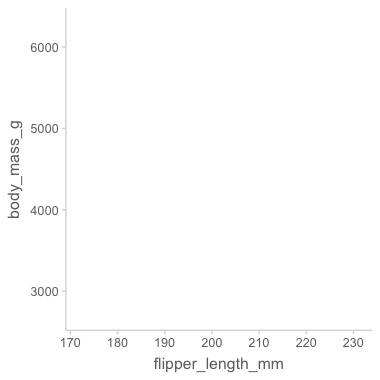

In [44]:
# x, y축에 변수를 mapping
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
)

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


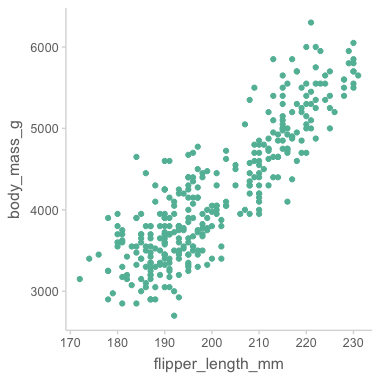

In [45]:
# point로 데이터를 표시: scatterplot
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point()
#> Warning: Removed 2 rows containing missing values (`geom_point()`).

::: {.callout-note}
실제로 `is.na()`함수를 이용해 missing을 확인해보면,
```r
penguins |>
  select(species, flipper_length_mm, body_mass_g) |>
  filter(is.na(body_mass_g) | is.na(flipper_length_mm))  # true, false의 boolean type
#> # A tibble: 2 × 3
#>   species flipper_length_mm body_mass_g
#>   <fct>               <int>       <int>
#> 1 Adelie                 NA          NA
#> 2 Gentoo                 NA          NA
```
:::

### Adding aesthetics and layers

In [46]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 95)

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


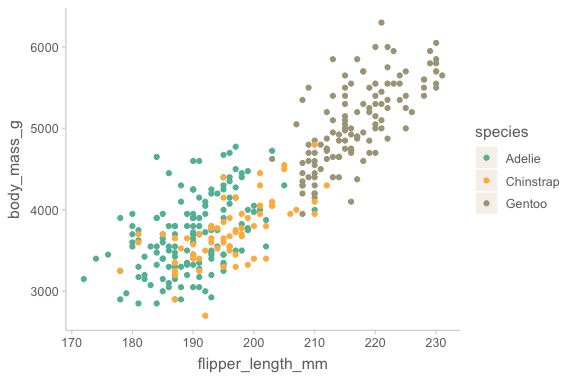

In [47]:
# spcies에 color (aesthetics)를 mapping
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = species)
) +
  geom_point()

위에서 species마다 다른 색을 입혀서 다른 패턴이 나타나는지 확인해 볼 수 있음

ggplot2는 `+` 기호로 연결하여 계속 layer를 추가할 수 있음.  
다음은 trendline 혹은 fitted line이라고 부르는 경향성을 확인해 볼 수 있는 라인의 layer를 추가함

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


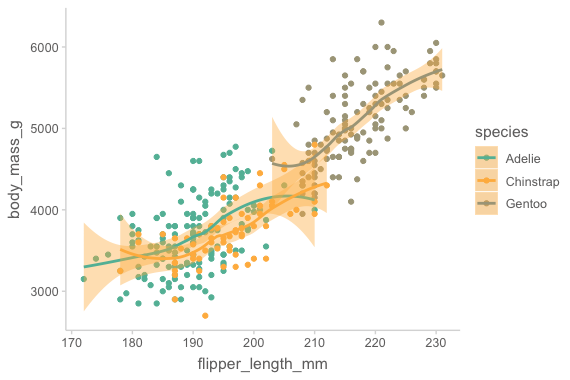

In [48]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = species)
) +
  geom_point() +
  geom_smooth()

::: {.callout-note}
Data에 fitted curve를 구하는 방식에는 여러 방법이 있음

- Linear fit: 1차 함수형태인 직선으로 fit
- Smoothing fit
  - Polynominal fit: n차 다항함수형태로 fit
  - Loess/lowess: locally estimated/weighted scatterplot smoothing
  - GAM: generalized additive model
  - Spine: piece-wise polynominal regression

나중에 좀 더 자세히 알아봄
:::

ggplot2는 플랏의 대상에 다음과 같은 속성을 부여할 수 있음  
`color`, `size`, `shape`, `fill`, `alpha`

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


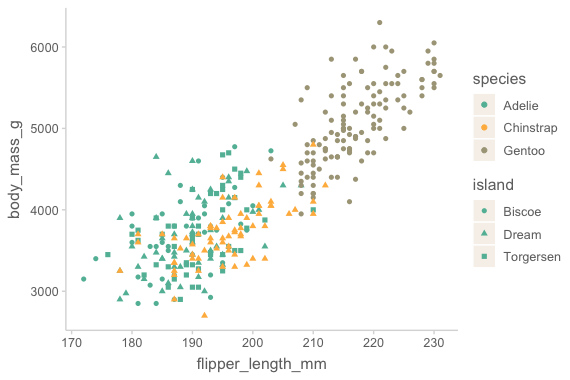

In [49]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = species, shape = island)
) +
  geom_point() 

::: {.callout-tip}
어떤 속성을 어떤 변수에 할당하는 것이 적절한지를 선택하는 것이 기술
:::

### Categorical vs. continuous

`color`와 같은 속성은 카테고리 변수가 좀 더 적절하나, 연속변수에서도 적용될 수 있음

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


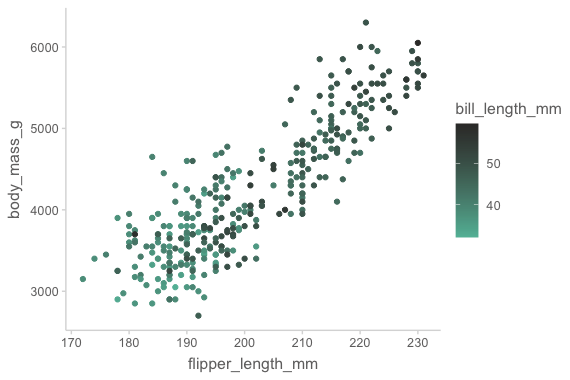

In [50]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = bill_length_mm)
) +
  geom_point() 

반대로, `x`, `y`에 카테고리 변수를 mapping하여 scatterplot을 그리면 다음과 같은 overploting의 문제가 생김

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


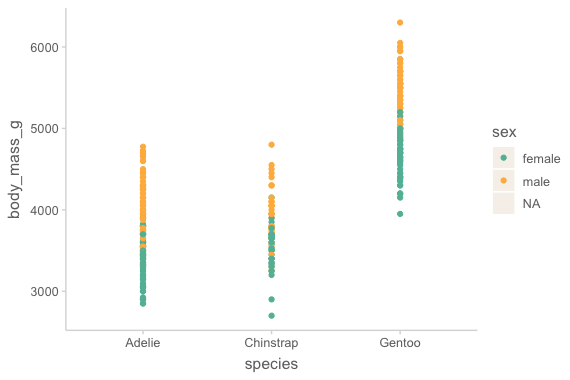

In [51]:
ggplot(
  data = penguins,
  mapping = aes(x = species, y = body_mass_g, color = sex)
) +
  geom_point() 

### **Overplotting**
Overplotting의 문제를 해결하는 방식은 주로  

- `alpha`(투명도)를 조정하거나 랜덤하게 흐뜨려그리는 `geom_jitter()`를 사용  
- 애초에 겹치지 않게 그리는 방법도 있음: e.g. beeswarm plot

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


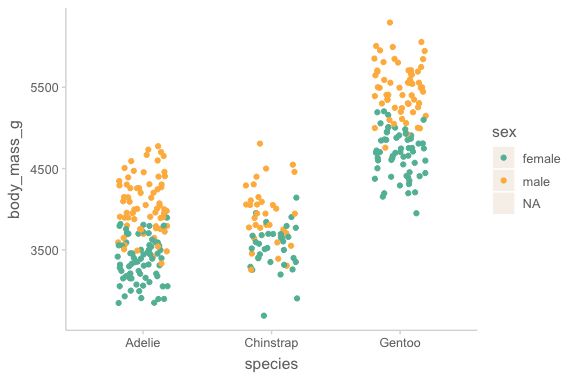

In [52]:
ggplot(
  data = penguins,
  mapping = aes(x = species, y = body_mass_g, color = sex)
) +
  geom_jitter(width = .2) # jitter의 정도: width, height

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


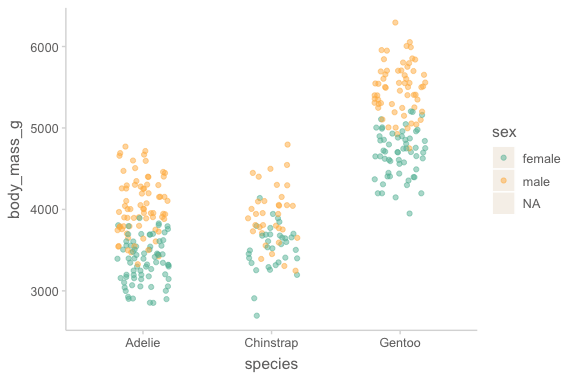

In [53]:
ggplot(
  data = penguins,
  mapping = aes(x = species, y = body_mass_g, color = sex)
) +
  geom_jitter(width = .2, alpha = .5) # alpha: 투명도 0 ~ 1

## Geometric objects
ggplot2는 40가지 넘는 geom objects를 제공함.  
주로 통계를 위해 쓰일 `geom`들은

- `geom_point`, `geom_smooth()`
- `geom_boxplot()`
- `geom_histogram()`, `geom_freqploy()`, `geom_density()`

**Global vs. local mapping**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


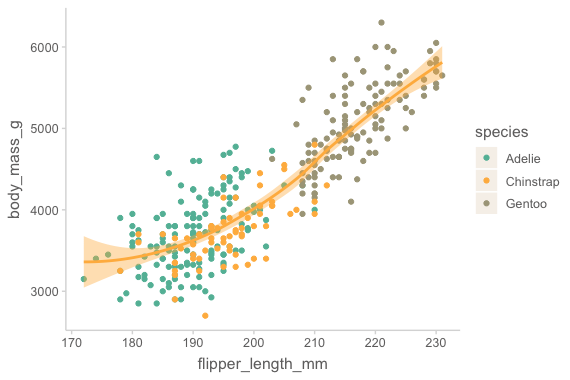

In [54]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point(mapping = aes(color = species)) + # color mapping은 geom_point에만 적용
  geom_smooth() # 맨 위의 mapping에 있는 global mapping을 inherit

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”


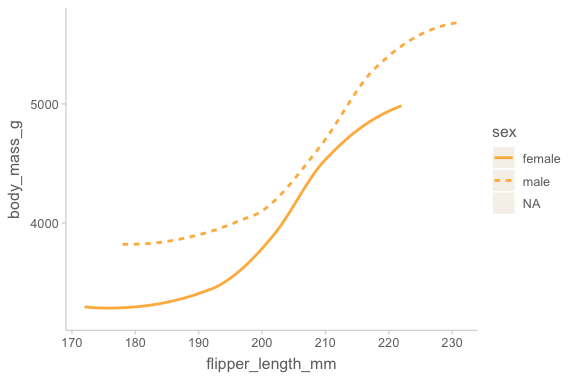

In [55]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_smooth(mapping = aes(linetype = sex), se = FALSE)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


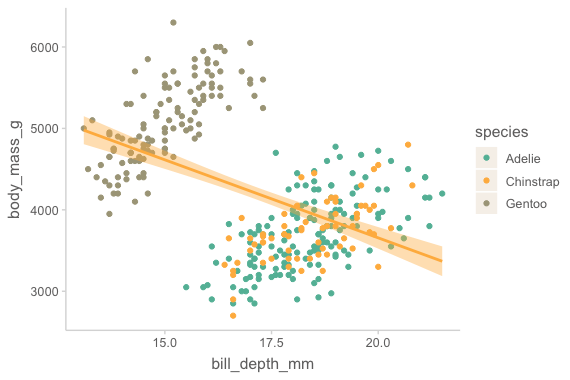

In [56]:
#| warning: false
ggplot(
    data = penguins,
    mapping = aes(x = bill_depth_mm, y = body_mass_g)
) +
  geom_point(mapping = aes(color = species)) +  # color mapping은 geom_point에만 
  geom_smooth(method = lm)  # 맨 위의 mapping에 있는 global mapping을 inherit, method: fitted line의 종류

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


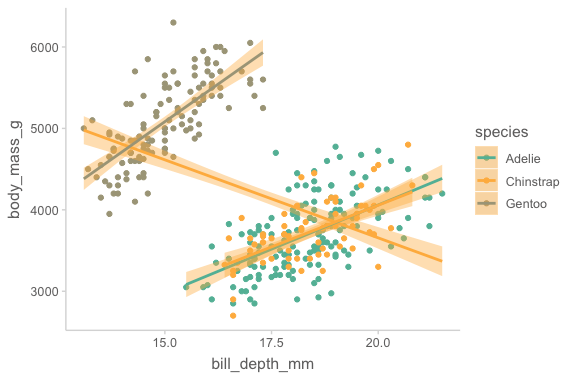

In [57]:
#| warning: false
ggplot(
    data = penguins,
    mapping = aes(x = bill_depth_mm, y = body_mass_g)
) +
  geom_point(mapping = aes(color = species)) +
  geom_smooth(method = lm) +  # 맨 위의 mapping에 있는 global mapping을 inherit
  geom_smooth(mapping = aes(color = species), method = lm) # color mapping 추가

**`aes()` 내부, 외부에서의 mapping**

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


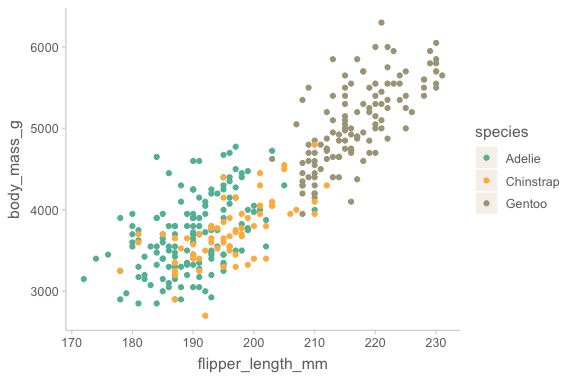

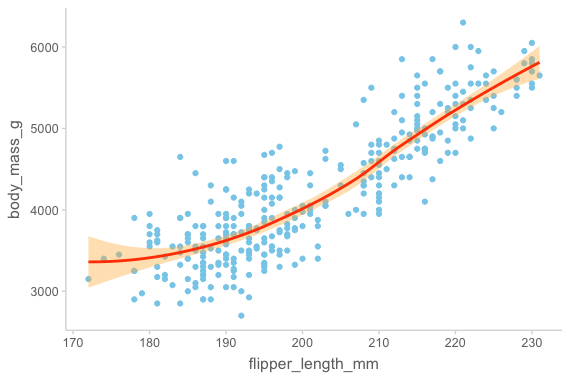

In [58]:
#| layout-ncol: 2
#| warning: false
ggplot(data = penguins, mapping = aes(x = flipper_length_mm, y = body_mass_g)) +
    geom_point(mapping = aes(color = species)) # aesthetic color에 변수를 mapping

ggplot(data = penguins, mapping = aes(x = flipper_length_mm, y = body_mass_g)) +
    geom_point(color = "skyblue") + # geom의 color 속성에 색을 지정
    geom_smooth(color = "orangered")

## Statistical transformations
ggplot2는 편의를 위해 통계치를 구해 표시해주는데,  
경우에 따라 직접 통계치를 계산 후 새로 얻는 데이터로 그리는 것이 유리함

In [20]:
#| echo: false
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 100)

### Distribution
`geom_histogram()`, `geom_freqploy()`, `geom_density()`

Warning message:
“Removed 2 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 39 rows containing missing values (`geom_path()`).”


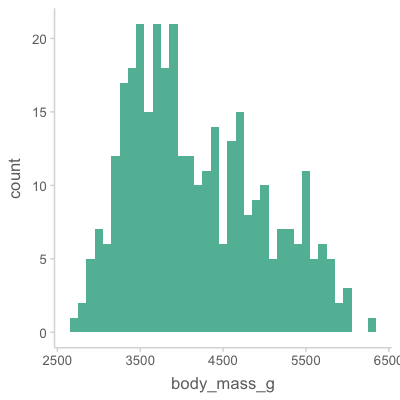

Warning message:
“Removed 2 rows containing non-finite values (`stat_density()`).”


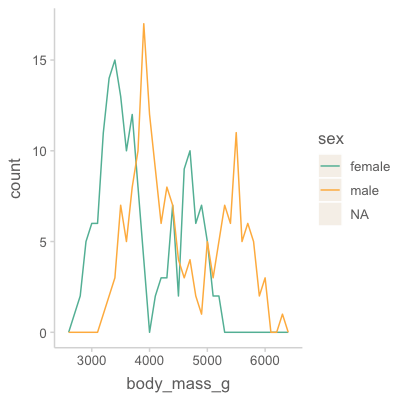

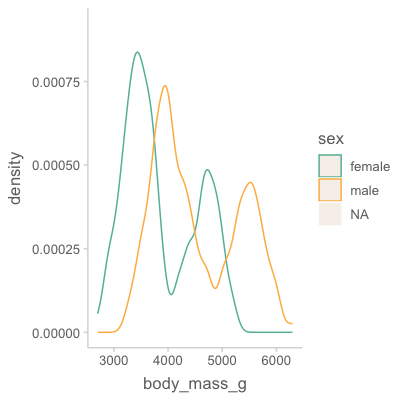

In [21]:
#| output: false
# y축에 표시되는 통계치들이 계산됨
ggplot(data = penguins, mapping = aes(x = body_mass_g)) +
  geom_histogram(binwidth = 100) # binwidth vs. bins

ggplot(data = penguins, mapping = aes(x = body_mass_g, colour = sex)) +
  geom_freqpoly(binwidth = 100)

ggplot(data = penguins, mapping = aes(x = body_mass_g, colour = sex)) +
  geom_density(bw = 100) # bw: band width

Warning message:
“Removed 2 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 39 rows containing missing values (`geom_path()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_density()`).”


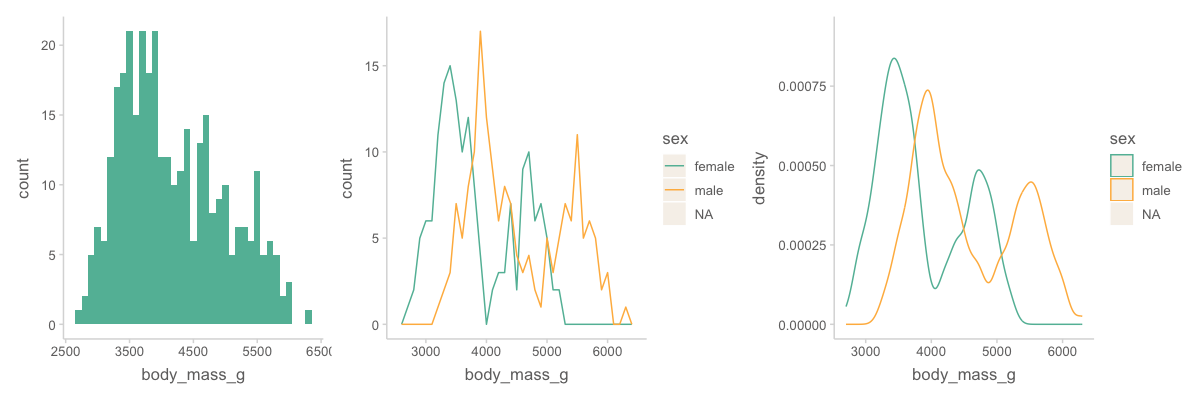

In [22]:
#| echo: false
#| warning: false
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 100)
hist1 <- ggplot(data = penguins, mapping = aes(x = body_mass_g)) +
  geom_histogram(binwidth = 100) 

hist2 <- ggplot(data = penguins, mapping = aes(x = body_mass_g, colour = sex)) +
    geom_freqpoly(binwidth = 100)

hist3 <- ggplot(data = penguins, mapping = aes(x = body_mass_g, colour = sex)) +
    geom_density(bw = 100)

library(patchwork)
hist1 + hist2 + hist3

### Boxplot
Boxplot은 분포에 대한 정보은 줄어드나, 카테고리별로 간결하게 비교되는 장점  
`boxplot()`  

![](images/boxplot.png){width=800}

In [60]:
#| echo: false
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 95)

Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


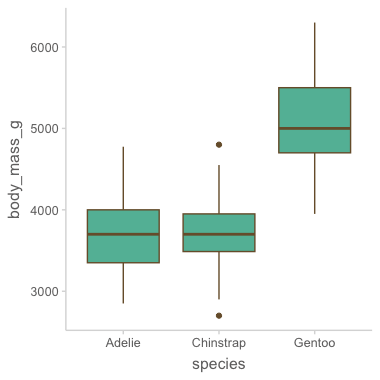

In [61]:
ggplot(data = penguins, mapping = aes(x = species, y = body_mass_g)) +
    geom_boxplot()

In [62]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 95)

Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


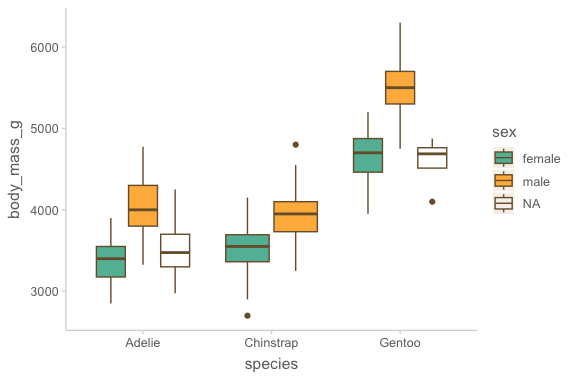

In [63]:
ggplot(data = penguins, mapping = aes(x = species, y = body_mass_g, fill = sex)) + # color는 box의 테두리 색, fill은 내부색
  geom_boxplot()

### Barplot
Barplot은 여러방식으로 쓸 수 있는데, 문법이 조금 복잡하고, 수업에서 거의 사용하지 않을 예정이므로 웹사이트를 참조  
[R for Data Science/Layers/Statistical transformations](https://r4ds.hadley.nz/layers.html#statistical-transformations)

In [64]:
#| echo: false
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 95)

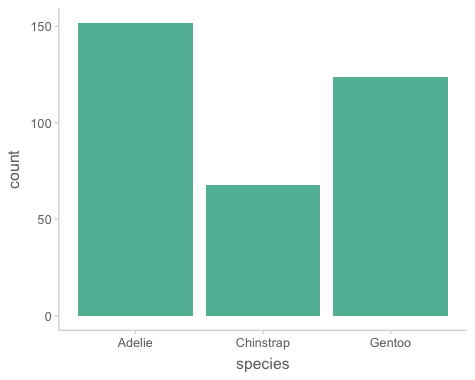

In [65]:
ggplot(data = penguins) + 
  geom_bar(mapping = aes(x = species)) # 개수

### Discretize
연속 변수를 임의의 구간으로 나누어 카테고리처럼 적용하기 할 수 있음  
`cut_width()`, `cut_number()`, `cut_interval()`

- `cut_width()`: 구간의 길이를 정함
- `cut_number()`: 동일한 갯수의 관측값을 갖는 n개의 그룹
- `cut_interval()`: 동일한 길이의 n개의 그룹

In [66]:
#| echo: false
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 95)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


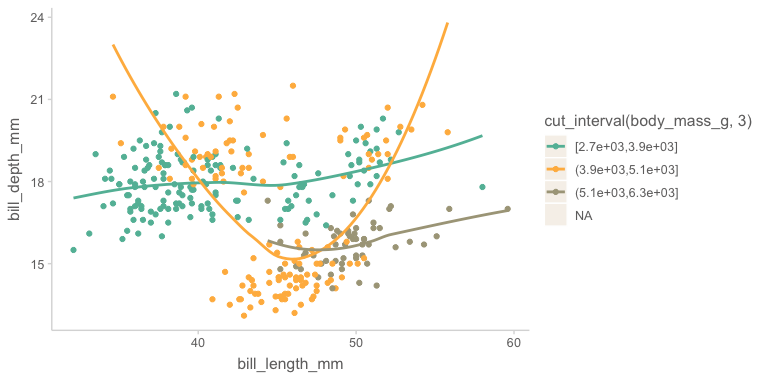

In [67]:
ggplot(
  data = penguins,
  mapping = aes(
      x = bill_length_mm, y = bill_depth_mm,
      color = cut_interval(body_mass_g, 3) # body_mass_g의 값을 3개의 동일한 길이의 구간으로 나눔
  )
) +
  geom_point() +
  geom_smooth(se = FALSE, span = 1) # span: smoothing 정도 조절

## Facets
카테고리 변수들이 지니는 카테고리들(레벨)로 나누어 그리기  
`facet_wrap()`, `facet_grid()`

In [68]:
#| echo: false
ggthemr("light", layout = "clear")

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


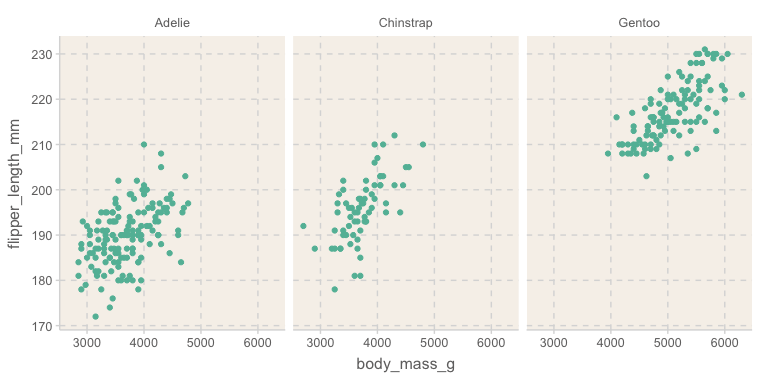

In [69]:
ggplot(data = penguins, aes(x = body_mass_g, y = flipper_length_mm)) +
  geom_point() +
  facet_wrap(~species) # species의 레벨로 나뉘어짐

`facet_wrap()`은 레벨이 많아지면 다음의 `facet_grid()`와는 다르게 화면크기에 맞춰 다음 줄로 넘어감

In [70]:
#| echo: false
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 95)

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


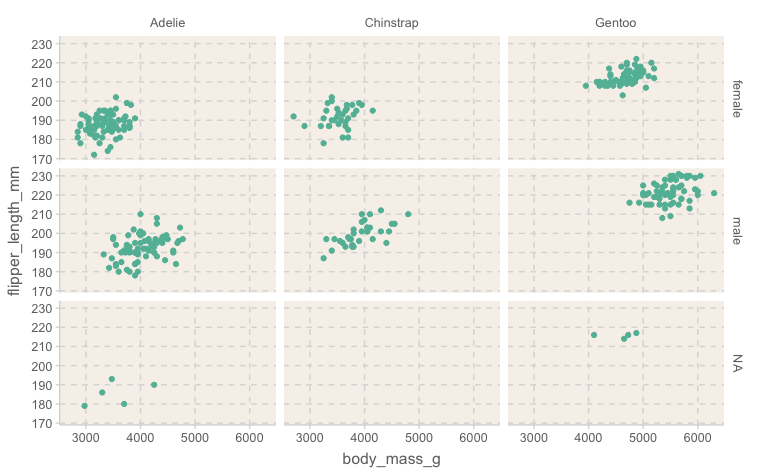

In [71]:
ggplot(data = penguins, aes(x = body_mass_g, y = flipper_length_mm)) +
  geom_point() +
  facet_grid(sex ~ species)  # 행과 열에 각각 sex, species

In [72]:
#| echo: false
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 95)

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


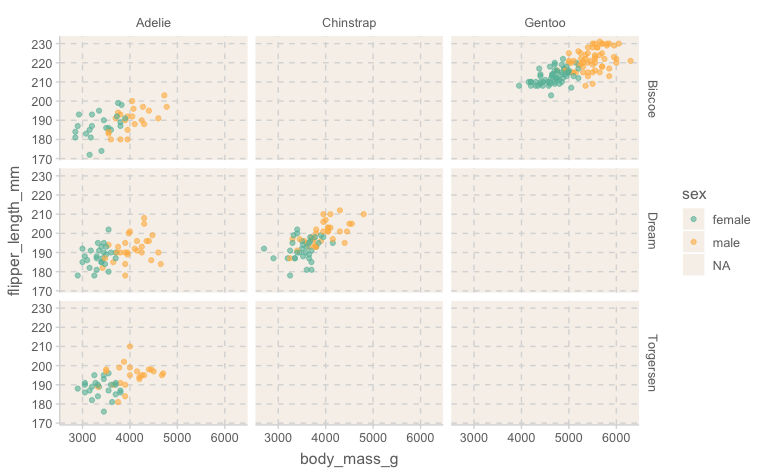

In [73]:
ggplot(
  data = penguins, 
  aes(x = body_mass_g, y = flipper_length_mm, color = sex) # color 추가
) +
  geom_point(alpha = .6) +
  facet_grid(island ~ species)  # 행과 열에 각각 sex, species

::: {.callout-important}
Facet과 color 중 어떤 방식으로 표현하는 것이 유리한가? 밸런스를 잘 선택!
:::

In [74]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 95)

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


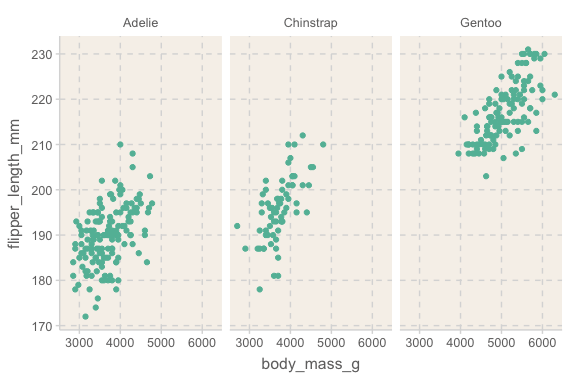

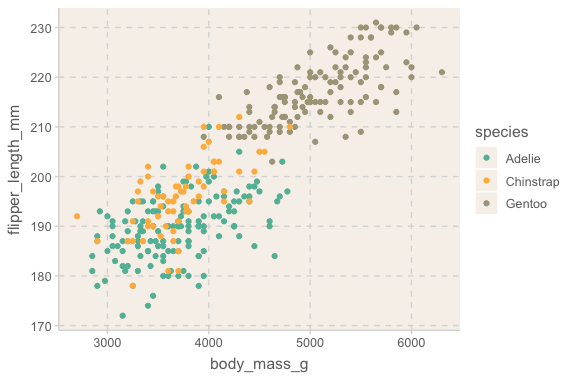

In [75]:
#| layout-ncol: 2
ggplot(data = penguins, aes(x = body_mass_g, y = flipper_length_mm)) +
  geom_point() +
  facet_wrap(~species)

ggplot(data = penguins, aes(x = body_mass_g, y = flipper_length_mm, color = species)) +
  geom_point()

In [76]:
#| echo: false
#| warning: false
ggthemr("light", layout = "minimal")
theme_set(theme_get())
theme_update(panel.background = element_rect(fill = "white"))

## Labels
`labs()` 안에 각 요소별로 지정

In [77]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 95)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


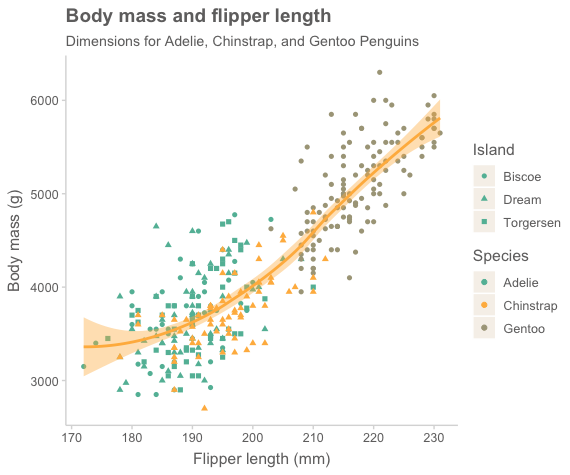

In [78]:
#| warning: false
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point(aes(color = species, shape = island)) +
  geom_smooth() +
  labs(
    title = "Body mass and flipper length",
    subtitle = "Dimensions for Adelie, Chinstrap, and Gentoo Penguins",
    x = "Flipper length (mm)", y = "Body mass (g)",
    color = "Species", shape = "Island"
  )

::: {.callout-note}
앞으로는 pipe operator와 함께, 축약 형태로

- `data = ` 대신 첫번째 argument 위치에 data frame이 위치
- `mapping = ` 은 두번째 argument 위치에 `aes()`을 위치

```r
ggplot(data = penguins, mapping = aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_point()
```
은 다음과 같이
```r
ggplot(penguins, aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_point()
```
:::

In [79]:
#| echo: false
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 95)

Pipe operator로 다음과 연결될 수 있음

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


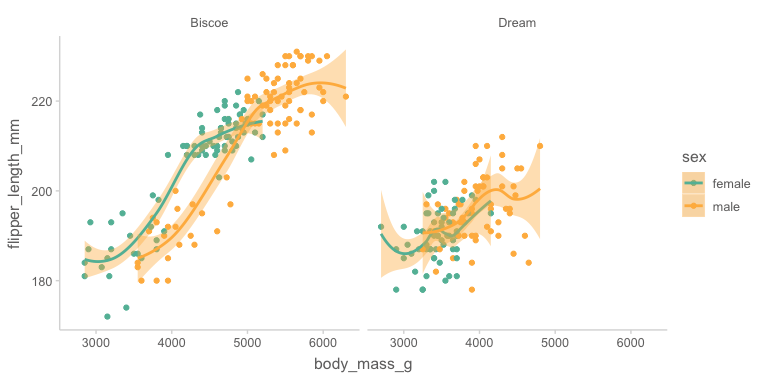

In [80]:
penguins |>
    filter(!is.na(sex) & island != "Torgersen") |>  # 성별이 missing이 아니고, Torgersen섬은 제외
    ggplot(aes(x = body_mass_g, y = flipper_length_mm, color = sex)) +
    geom_point() +
    geom_smooth() +
    facet_wrap(~island)

## Examples
이전에 다뤘던 CPS85 데이터로 보면,

In [81]:
#| echo: false
#| warning: false
ggthemr("light")

In [82]:
cps <- as_tibble(mosaicData::CPS85) # mosaicData package의 CPS85 데이터셋
cps |>
   print() # 생략!

# A tibble: 534 × 11
   wage  educ race  sex   hispanic south married exper union   age sector  
  <dbl> <int> <fct> <fct> <fct>    <fct> <fct>   <int> <fct> <int> <fct>   
1   9      10 W     M     NH       NS    Married    27 Not      43 const   
2   5.5    12 W     M     NH       NS    Married    20 Not      38 sales   
3   3.8    12 W     F     NH       NS    Single      4 Not      22 sales   
4  10.5    12 W     F     NH       NS    Married    29 Not      47 clerical
5  15      12 W     M     NH       NS    Married    40 Union    58 const   
6   9      16 W     F     NH       NS    Married    27 Not      49 clerical
# … with 528 more rows


In [84]:
#| echo: false
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 95)

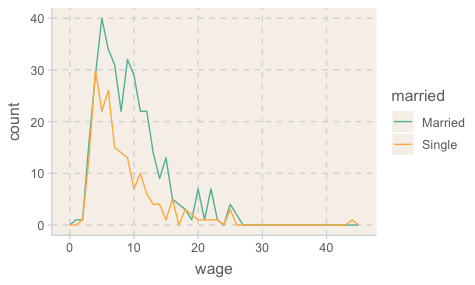

In [85]:
cps |>
    ggplot(aes(x = wage, color = married)) +
    geom_freqpoly(binwidth=1)

In [86]:
#| echo: false
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 95)

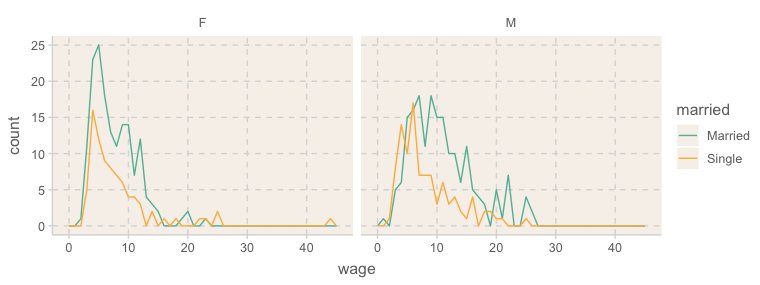

In [87]:
cps |>
    ggplot(aes(x = wage, color = married)) +
    geom_freqpoly(binwidth = 1) +
    facet_wrap(~sex)

In [88]:
#| echo: false
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 95)

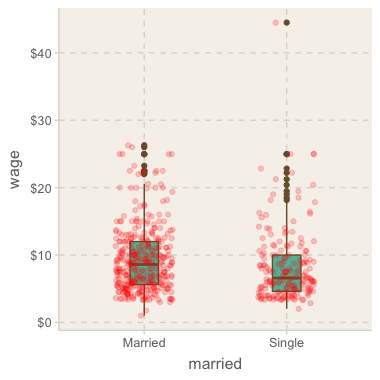

In [89]:
cps |>
  ggplot(aes(x = married, y = wage)) +
  geom_boxplot(width = .2) +
  geom_jitter(width = .2, alpha = .2, color = "red") +
  scale_y_continuous(label = scales::label_dollar())  # y축 scale의 변경


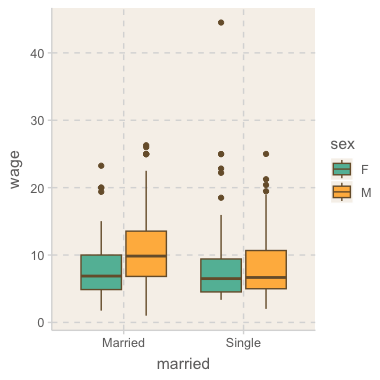

In [90]:
cps |>
  ggplot(aes(x = married, y = wage, fill = sex)) +
  geom_boxplot()
  

In [91]:
#| echo: false
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 95)

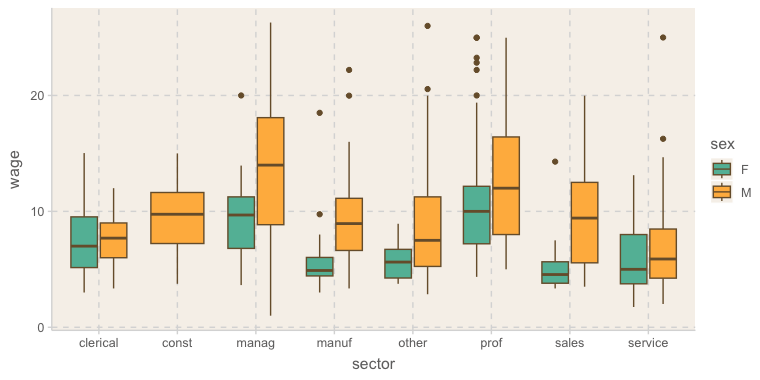

In [92]:
cps |>
    filter(wage < 30) |> 
    ggplot(aes(x = sector, y = wage, fill = sex)) +
    geom_boxplot()

In [93]:
#| echo: false
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 95)

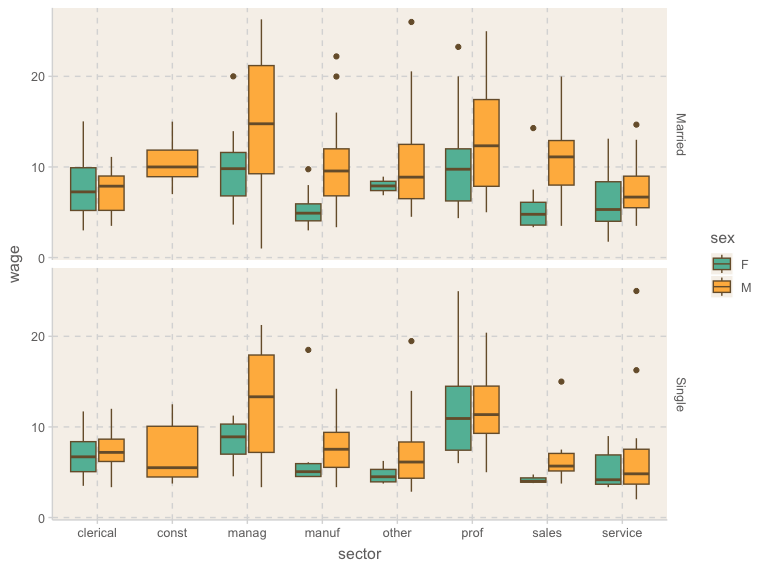

In [94]:
cps |>
    filter(wage < 30) |>
    ggplot(aes(x = sector, y = wage, fill = sex)) +
    geom_boxplot() +
    facet_grid(married ~ .) 

In [95]:
#| echo: false
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 95)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


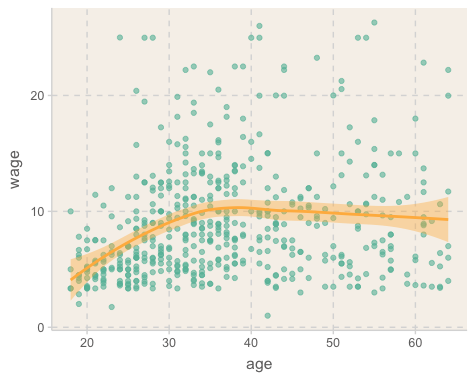

In [96]:
plot <- cps |>
  filter(wage < 30) |>
  ggplot(aes(x = age, y = wage)) +
  geom_point(alpha = .6) +
  geom_smooth()
plot

::: {.callout-important}
확대, 축소 혹은 제한된 범위에서 보려면 다음 2가지를 구분해야 함  
`coord_cartesian()` vs. `xlim()` or `ylim()`
:::

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


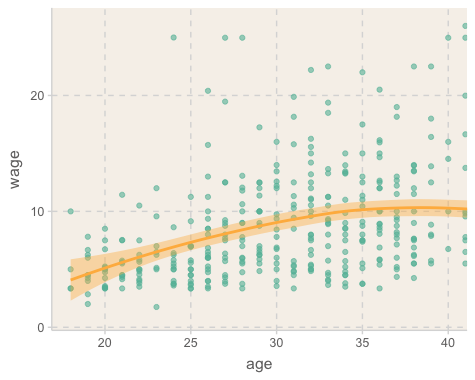

In [97]:
plot + coord_cartesian(xlim = c(18, 40)) # zoom in

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 181 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 181 rows containing missing values (`geom_point()`).”


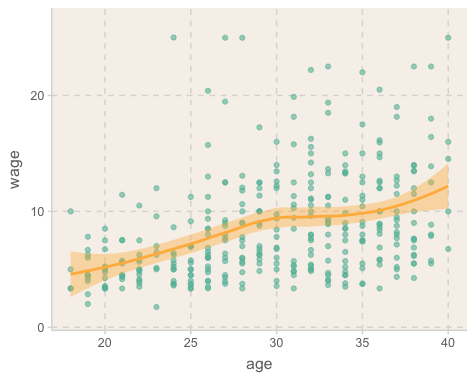

In [98]:
plot + xlim(18, 40) # data crop

In [99]:
#| echo: false
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 95)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


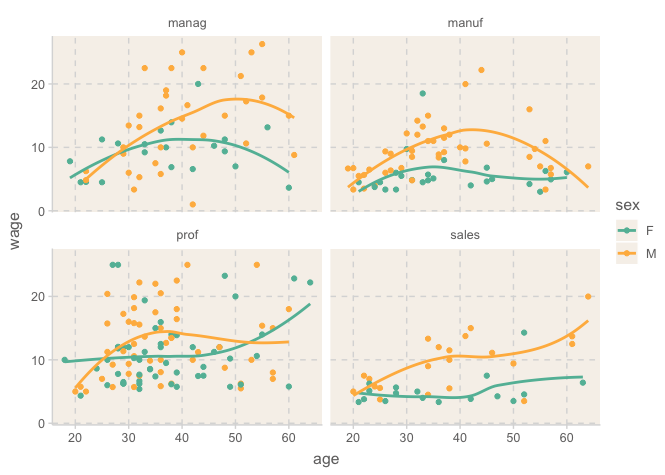

In [100]:
cps |>
    filter(wage < 30 & sector %in% c("manag", "manuf", "prof", "sales")) |>
    ggplot(aes(x = age, y = wage, color = sex)) +
    geom_point() +
    geom_smooth(se = FALSE, span = 1) +
    facet_wrap(~sector)